In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("spotify_main_raw_data.csv")

In [4]:
df.head()

,Unnamed: 0,artist,track,danceability,energy,key,loudness,mode,speechiness,acousticness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,playlist
0,0,Jonas Blue,Mama - Acoustic,0.564,0.364,10,-5.845,0,0.0631,0.75900,...,0.591,86.538,audio_features,3VOtM6x5KXZuxSzHaaf9oO,spotify:track:3VOtM6x5KXZuxSzHaaf9oO,https://api.spotify.com/v1/tracks/3VOtM6x5KXZu...,https://api.spotify.com/v1/audio-analysis/3VOt...,192277,4,ryan
1,1,Jooyoung,Same as you,0.701,0.519,1,-6.382,1,0.0516,0.31400,...,0.498,89.977,audio_features,0wpskpgrWHEDWjPgkddspN,spotify:track:0wpskpgrWHEDWjPgkddspN,https://api.spotify.com/v1/tracks/0wpskpgrWHED...,https://api.spotify.com/v1/audio-analysis/0wps...,223044,4,ryan
2,2,Nightwish,The Poet And The Pendulum,0.309,0.740,7,-5.917,0,0.0456,0.00854,...,0.166,144.861,audio_features,2XD4JzbZWRuRKzzCi5Cocm,spotify:track:2XD4JzbZWRuRKzzCi5Cocm,https://api.spotify.com/v1/tracks/2XD4JzbZWRuR...,https://api.spotify.com/v1/audio-analysis/2XD4...,834720,4,ryan
3,3,Ed Sheeran,Afire Love,0.552,0.637,5,-6.568,1,0.0445,0.46400,...,0.333,97.970,audio_features,12B0Twa9kRz45Xw2PgXHJm,spotify:track:12B0Twa9kRz45Xw2PgXHJm,https://api.spotify.com/v1/tracks/12B0Twa9kRz4...,https://api.spotify.com/v1/audio-analysis/12B0...,314280,4,ryan
4,4,Linkin Park,Given Up,0.655,0.885,7,-4.116,1,0.0438,0.00117,...,0.938,100.088,audio_features,1fLlRApgzxWweF1JTf8yM5,spotify:track:1fLlRApgzxWweF1JTf8yM5,https://api.spotify.com/v1/tracks/1fLlRApgzxWw...,https://api.spotify.com/v1/audio-analysis/1fLl...,189293,4,ryan


In [5]:
df.describe()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000
mean,46.803965,0.619352,0.651019,5.107930,-6.854524,0.612335,0.099611,0.229675,0.055642,0.185775,0.498712,121.872192,226500.773128,3.960352
std,28.638015,0.161691,0.194333,3.640498,2.979105,0.487755,0.102416,0.272957,0.190614,0.139394,0.245412,29.260798,63412.058603,0.349349
min,0.000000,0.142000,0.054500,0.000000,-24.877000,0.000000,0.023200,0.000017,0.000000,0.026900,0.038400,61.311000,71627.000000,1.000000
25%,22.000000,0.532000,0.521250,2.000000,-8.130250,0.000000,0.037700,0.015825,0.000000,0.095025,0.304250,100.005500,192443.000000,4.000000
50%,45.000000,0.637000,0.657500,5.000000,-6.387000,1.000000,0.054950,0.102000,0.000003,0.134000,0.494500,119.969500,219673.500000,4.000000
75%,71.000000,0.743750,0.805500,8.000000,-4.878750,1.000000,0.113000,0.372750,0.000490,0.237000,0.689500,139.081250,250063.500000,4.000000
max,99.000000,0.966000,0.995000,11.000000,-1.395000,1.000000,0.684000,0.988000,0.977000,0.966000,0.979000,205.846000,834720.000000,5.000000


In [8]:
df_cluster = df.select_dtypes('number')

In [9]:
df_cluster.head()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,0.564,0.364,10,-5.845,0,0.0631,0.75900,0.000000,0.0839,0.591,86.538,192277,4
1,1,0.701,0.519,1,-6.382,1,0.0516,0.31400,0.000000,0.2070,0.498,89.977,223044,4
2,2,0.309,0.740,7,-5.917,0,0.0456,0.00854,0.025800,0.1190,0.166,144.861,834720,4
3,3,0.552,0.637,5,-6.568,1,0.0445,0.46400,0.000016,0.1360,0.333,97.970,314280,4
4,4,0.655,0.885,7,-4.116,1,0.0438,0.00117,0.000473,0.0448,0.938,100.088,189293,4


In [11]:
df_cluster = df_cluster.iloc[:,1:]

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc = StandardScaler()
df_cluster_sc = sc.fit_transform(df_cluster)

In [14]:
df_cluster_sc

array([[-0.34271162, -1.47857097,  1.34527393, ..., -1.20889287,
        -0.54029987,  0.11361499],
       [ 0.50551668, -0.6800917 , -1.12964245, ..., -1.09123396,
        -0.054573  ,  0.11361499],
       [-1.92153072,  0.4583852 ,  0.5203018 , ...,  0.78651881,
         9.60211975,  0.11361499],
       ...,
       [-0.35509451,  1.45777215, -0.02967961, ..., -0.64423957,
         0.77577413,  0.11361499],
       [ 0.76555748, -1.05614968, -0.30467032, ...,  0.05897686,
         0.088507  ,  0.11361499],
       [-0.72038991, -0.36069999,  0.2453111 , ..., -0.9346063 ,
         0.11209318,  0.11361499]])

# KMeans

Text(0, 0.5, 'Inertia')

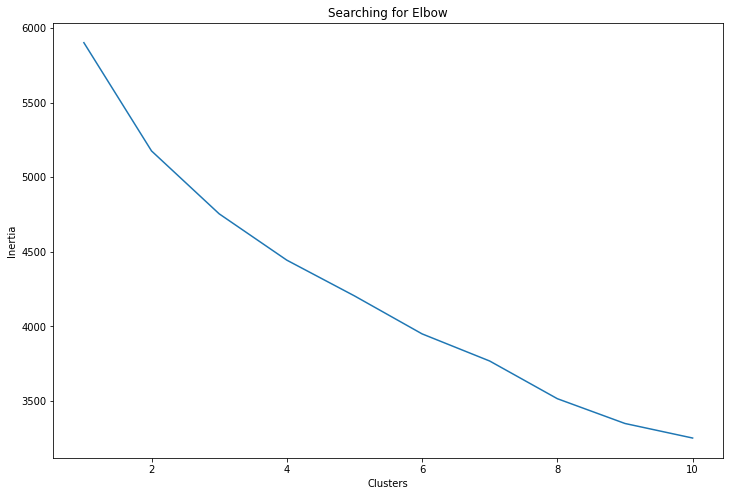

In [15]:
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(df_cluster_sc)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

In [16]:
# choose cluster as 5
km = KMeans(6).fit(df_cluster_sc)

In [18]:
df_cluster["kmeans"] = km.labels_

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_cluster_sc)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])

In [20]:
principalDf.head()

,pc1,pc2
0,1.538357,-1.639000
1,0.344003,-0.984738
2,0.179751,5.821062
3,0.826380,0.482821
4,-2.048611,-0.640299


In [29]:
df.shape

(454, 24)

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

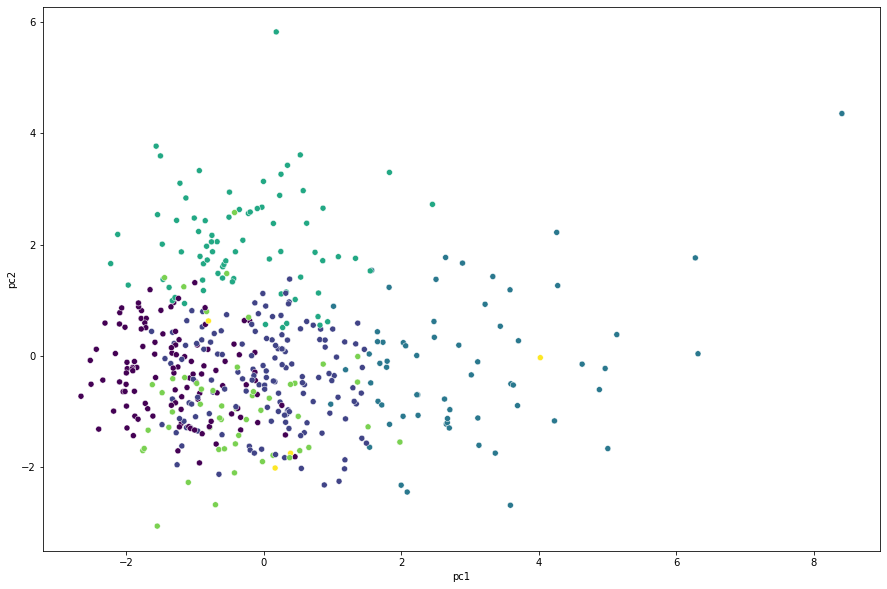

In [23]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=principalDf["pc1"], y = principalDf["pc2"], c=df_cluster["kmeans"])

# Agglorative Clustering

In [25]:
from sklearn.cluster import AgglomerativeClustering 

agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(df_cluster_sc)

df_cluster['agg_labels'] = agglom.labels_


<AxesSubplot:xlabel='pc1', ylabel='pc2'>

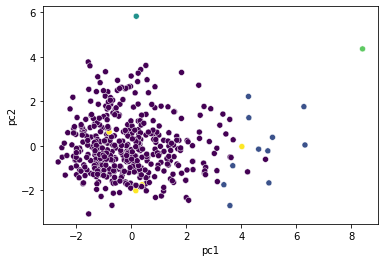

In [26]:
sns.scatterplot(x=principalDf["pc1"], y = principalDf["pc2"], c=df_cluster["agg_labels"])

# DBScan

In [27]:
from sklearn.cluster import DBSCAN 

db = DBSCAN(eps=11, min_samples=5).fit(df_cluster_sc)

df_cluster['dbscan_labels'] = db.labels_


<AxesSubplot:xlabel='pc1', ylabel='pc2'>

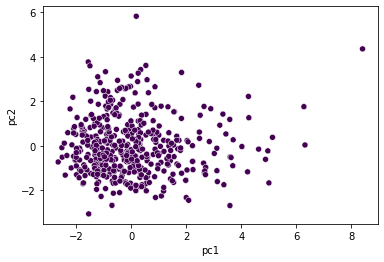

In [28]:
sns.scatterplot(x=principalDf["pc1"], y = principalDf["pc2"], c=df_cluster["dbscan_labels"])

# Song Recommendation

In [30]:
df

,Unnamed: 0,artist,track,danceability,energy,key,loudness,mode,speechiness,acousticness,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,playlist,kmeans_label,agg_labels
0,0,Jonas Blue,Mama - Acoustic,0.564,0.364,10,-5.845,0,0.0631,0.75900,...,audio_features,3VOtM6x5KXZuxSzHaaf9oO,spotify:track:3VOtM6x5KXZuxSzHaaf9oO,https://api.spotify.com/v1/tracks/3VOtM6x5KXZu...,https://api.spotify.com/v1/audio-analysis/3VOt...,192277,4,ryan,2,0
1,1,Jooyoung,Same as you,0.701,0.519,1,-6.382,1,0.0516,0.31400,...,audio_features,0wpskpgrWHEDWjPgkddspN,spotify:track:0wpskpgrWHEDWjPgkddspN,https://api.spotify.com/v1/tracks/0wpskpgrWHED...,https://api.spotify.com/v1/audio-analysis/0wps...,223044,4,ryan,1,0
2,2,Nightwish,The Poet And The Pendulum,0.309,0.740,7,-5.917,0,0.0456,0.00854,...,audio_features,2XD4JzbZWRuRKzzCi5Cocm,spotify:track:2XD4JzbZWRuRKzzCi5Cocm,https://api.spotify.com/v1/tracks/2XD4JzbZWRuR...,https://api.spotify.com/v1/audio-analysis/2XD4...,834720,4,ryan,3,2
3,3,Ed Sheeran,Afire Love,0.552,0.637,5,-6.568,1,0.0445,0.46400,...,audio_features,12B0Twa9kRz45Xw2PgXHJm,spotify:track:12B0Twa9kRz45Xw2PgXHJm,https://api.spotify.com/v1/tracks/12B0Twa9kRz4...,https://api.spotify.com/v1/audio-analysis/12B0...,314280,4,ryan,1,0
4,4,Linkin Park,Given Up,0.655,0.885,7,-4.116,1,0.0438,0.00117,...,audio_features,1fLlRApgzxWweF1JTf8yM5,spotify:track:1fLlRApgzxWweF1JTf8yM5,https://api.spotify.com/v1/tracks/1fLlRApgzxWw...,https://api.spotify.com/v1/audio-analysis/1fLl...,189293,4,ryan,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,50,ABBA,Dancing Queen,0.543,0.870,9,-6.514,1,0.0428,0.35800,...,audio_features,0GjEhVFGZW8afUYGChu3Rr,spotify:track:0GjEhVFGZW8afUYGChu3Rr,https://api.spotify.com/v1/tracks/0GjEhVFGZW8a...,https://api.spotify.com/v1/audio-analysis/0GjE...,230400,4,alex,0,0
450,51,Journey,Don't Stop Believin',0.500,0.748,4,-9.072,1,0.0363,0.12700,...,audio_features,4bHsxqR3GMrXTxEPLuK5ue,spotify:track:4bHsxqR3GMrXTxEPLuK5ue,https://api.spotify.com/v1/tracks/4bHsxqR3GMrX...,https://api.spotify.com/v1/audio-analysis/4bHs...,250987,4,alex,1,0
451,52,Rascal Flatts,Life is a Highway,0.562,0.934,5,-5.562,1,0.0607,0.00211,...,audio_features,5gB2IrxOCX2j9bMnHKP38i,spotify:track:5gB2IrxOCX2j9bMnHKP38i,https://api.spotify.com/v1/tracks/5gB2IrxOCX2j...,https://api.spotify.com/v1/audio-analysis/5gB2...,275640,4,alex,0,0
452,53,The White Stripes,Seven Nation Army,0.743,0.446,4,-7.807,0,0.0683,0.00390,...,audio_features,3dPQuX8Gs42Y7b454ybpMR,spotify:track:3dPQuX8Gs42Y7b454ybpMR,https://api.spotify.com/v1/tracks/3dPQuX8Gs42Y...,https://api.spotify.com/v1/audio-analysis/3dPQ...,232107,4,alex,1,0


# Testing on example song to find closest songs

In [31]:
song = "Afire Love"

In [33]:
cluster_num = df[df["track"]==song]["kmeans_label"].values[0]
cluster_num

1

In [34]:
df[df["kmeans_label"]==cluster_num]["track"].values

array(['Same as you', 'Afire Love', 'All About Us', 'End Of All Hope',
       'Oops!...I Did It Again', 'Talking to Myself', 'Perfect',
       'Turn Up the Music', 'Beautiful In White',
       'Secret Love Song (feat. Jason Derulo)', 'Up All Night',
       "Like I'm Gonna Lose You (feat. John Legend)", 'Left Right Left',
       'How Do You Do?', 'Some Type of Love', 'One Call Away',
       'CAN\'T STOP THE FEELING! (from DreamWorks Animation\'s "TROLLS")',
       'All We Know', 'Uptown Funk (feat. Bruno Mars)',
       'Dear Future Husband', '孤單北半球', 'abcdefu', 'DÁKITI', 'Anyone',
       'Dazed & Confused', 'lie to me', 'GROWING UP IS _____',
       'Bad Girl - JVKE Remix', 'Frankenstein', 'Angel Baby',
       'One Right Now (with The Weeknd)', 'Saint-Tropez', 'Better Now',
       'Drugs & The Internet', "fuck, i'm lonely (with Anne-Marie)",
       'Modern Loneliness',
       'Save Your Tears (Remix) (with Ariana Grande) - Bonus Track',
       'STAY (with Justin Bieber)', 'breathin', 'Y